<a href="https://colab.research.google.com/github/pnjha/APS_Project/blob/master/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
!apt-get install cython
!pip install planarity
!pip install graphviz
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

In [0]:
import time
import sys
import networkx as nx
import itertools as it
import planarity 
import random
from networkx.algorithms import bipartite
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [4]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive"

'2018201013_1 (1).cpp'		        a.out
'2018201013_1 (2).cpp'		        APS_Project
 2018201013_1.cpp		        bar.txt
'2018201013_1 - Prakash Nath Jha.cpp'  'Colab Notebooks'
'2018201013_2 (1).cpp'		        copyFile.cpp
'2018201013_2 (2).cpp'		        driverincpp.cpp
 2018201013_2.cpp		        everything.pdf
'2018201013_2 - Prakash Nath Jha.cpp'   ls_function.cpp
'2018201013_3 (1).cpp'		        moveFile.cpp
'2018201013_3 (2).cpp'		        openFile.cpp
 2018201013_3.cpp		        resumePrakash.pdf
'2018201013_3 - Prakash Nath Jha.cpp'   search.cpp
 2018201013_4			        sed_commands1.gdoc
'2018201013_4 (1).cpp'		        sed_commands2.gdoc
 2018201013_4.cpp		        test2.cpp
'2018201013_4 - Prakash Nath Jha.cpp'   test.cpp


In [5]:
!pwd
!cd "/content/drive/My Drive/APS_Project"
!pwd

/content
/content


In [0]:
def floydWarshall(dist,vertices): 
	for k in range(vertices-1): 
		for i in range(vertices-1): 
			for j in range(vertices-1): 
				dist[i][j] = min(dist[i][j],dist[i][k]+dist[k][j])

In [0]:
def DPC(graph,vertices):

    for k in range(vertices-2, -1, -1):
        for j in range(0,k):
            for i in range(0,j):
                if graph[i][k] != float('inf') and graph[k][j] != float('inf'):
                    graph[i][j] = min(graph[i][j], graph[i][k]+graph[k][j])    
                if graph[j][k] != float('inf') and graph[k][i] != float('inf'):
                    graph[j][i] = min(graph[j][i], graph[j][k]+graph[k][i])
                if graph[i][j]+graph[j][i] < 0:
                    return False
    return True ,graph

In [0]:
def snowball(dist,vertices):
    graph = dist
    for k in range(vertices-1):
        for j in range(k-1, 0, -1):
            for i in range(0, k):
                dist[i][k] = min(dist[i][k], dist[i][j]+graph[j][k])
                dist[k][i] = min(dist[k][i], dist[j][i]+graph[k][j])


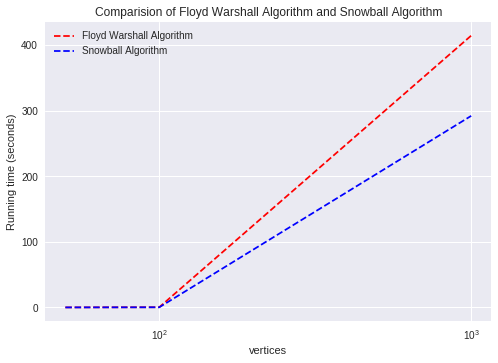

In [11]:
vertex = [50,100,1000]

def createMatrix(vertices):

	#************* Reading from file ****************************************

	filename = '/content/drive/My Drive/APS_Project/planar_'+str(vertices)+'_nodes.txt'

	x,y = np.loadtxt(filename, delimiter = "\t", unpack = True)

	#************************************************************************

	#************ Generating Incident Matrix ********************************

	G = nx.Graph()
	G.add_nodes_from([1,vertices])


	for x1,y1 in zip(x,y):
		x1 = int(x1)
		y1 = int(y1)
		G.add_edge(x1,y1,weight = random.randint(1,1001))

	#**************************************************************************

	#************ Generating 2D adjacency matric ******************************

	A = nx.adjacency_matrix(G)
	b = A.todense()

	gr = []
	gr = nx.to_numpy_matrix(G)
	llist = []
	graph = []
	counter = 0
	c = 0
	for x in np.nditer(gr):
		c += 1
		if counter == vertices:
			counter = 0
			graph.append(llist)
			llist = []

		if x == 0:
			llist.append(float('inf'))
			counter += 1
		else:
			llist.append(int(x))
			counter += 1	
	return graph		

#************************************************************************

#***************** Executing and measuring time **************

FTIME = []
STIME = []

for value in vertex:

	graph = createMatrix(value)

	start = time.time()
	floydWarshall(graph,value)
	end = time.time()
	FTIME.append(end - start)


	flag, graph = DPC(graph,value)		

	if flag == True:
		start = time.time()
		snowball(graph,value)
		end = time.time()
		STIME.append(end - start)

# for duration in FTIME:
# 	print duration

# for duration in STIME:
# 	print duration

plt.plot(vertex, FTIME, 'r--', label = 'Floyd Warshall Algorithm')
plt.plot(vertex, STIME, 'b--', label = 'Snowball Algorithm')	
plt.xscale("log")
plt.xlabel('vertices')
plt.ylabel('Running time (seconds)')
plt.title('Comparision of Floyd Warshall Algorithm and Snowball Algorithm')
plt.legend()
plt.show()